# Import Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Handling Missing Values

In [13]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])


# Convert Categorical Features into Numericals

In [19]:
le = LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])



In [20]:
# One-hot encoding for multi-class categorical features
df = pd.get_dummies(df, columns=['Cabin', 'Embarked'], drop_first=True)

# Normalize/Standardize Numericals Features

In [21]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns


In [22]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Visualize Outliers Using Boxplots and Remove Them

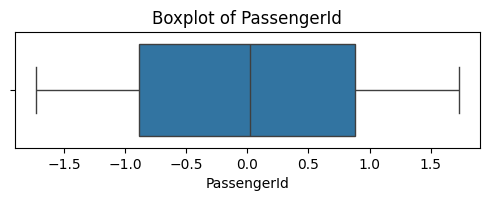

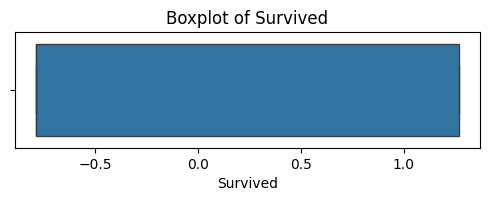

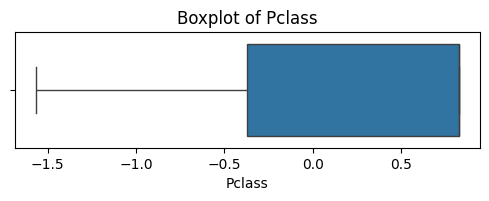

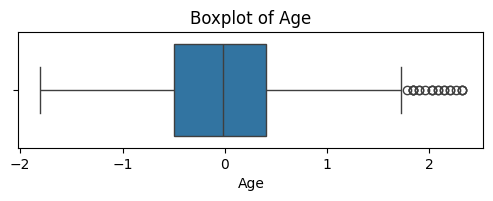

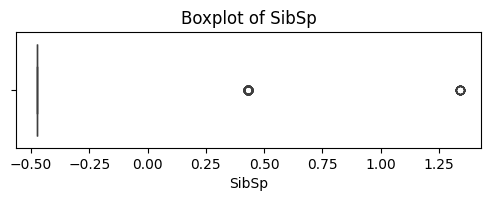

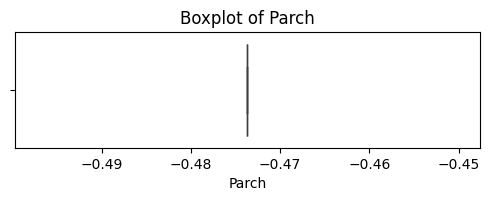

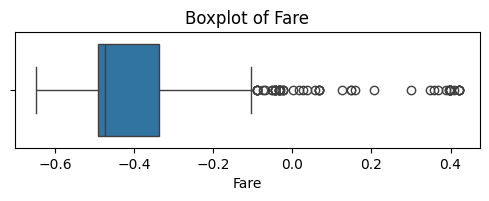

In [25]:
# Visualize outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Remove outliers using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]




In [26]:
print("Final Data Shape:", df.shape)
print(df.head())


Final Data Shape: (398, 158)
    PassengerId  Survived    Pclass                                  Name  \
2     -1.722332  1.266990  0.827377                Heikkinen, Miss. Laina   
4     -1.714556 -0.789272  0.827377              Allen, Mr. William Henry   
5     -1.710669 -0.789272  0.827377                      Moran, Mr. James   
12    -1.683453 -0.789272  0.827377        Saundercock, Mr. William Henry   
14    -1.675678 -0.789272  0.827377  Vestrom, Miss. Hulda Amanda Adolfina   

       Sex       Age     SibSp     Parch            Ticket      Fare  ...  \
2   female -0.314113 -0.474545 -0.473674  STON/O2. 3101282 -0.488854  ...   
4     male  0.524193 -0.474545 -0.473674            373450 -0.486337  ...   
5     male -0.014718 -0.474545 -0.473674            330877 -0.478116  ...   
12    male -0.853024 -0.474545 -0.473674         A/5. 2151 -0.486337  ...   
14  female -1.272177 -0.474545 -0.473674            350406 -0.490280  ...   

    Cabin_139  Cabin_140  Cabin_141  Cabin_14